# <font color='darkred'> **Septimo Laboratorio: Mejoramiento de imagen a color**#

1. Tomar la imagen a color

2. Convertir RGB a HSV

3. Ecualizar sólo el canal H

4. Convertir el nuevo HSV a RGB


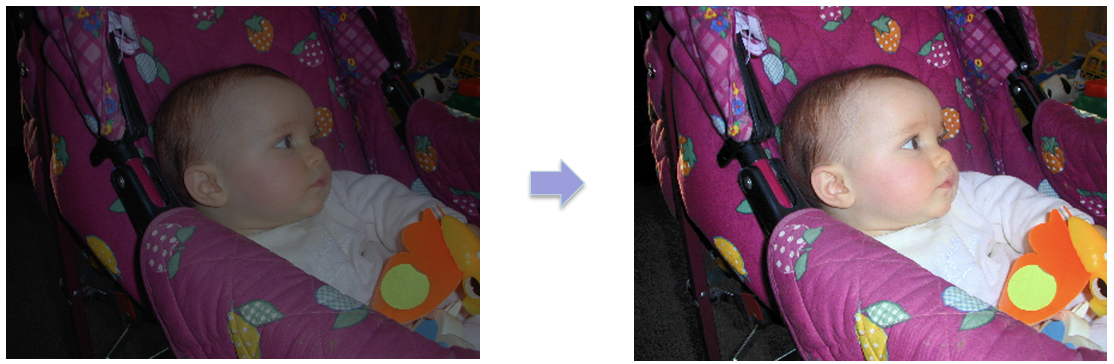

# <font color='darkred'> Cargar la imagen

In [ ]:
!wget https://www.dropbox.com/s/vgn705xke4ch8yt/bebe.png

--2023-03-05 18:19:44--  https://www.dropbox.com/s/vgn705xke4ch8yt/bebe.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/vgn705xke4ch8yt/bebe.png [following]
--2023-03-05 18:19:45--  https://www.dropbox.com/s/raw/vgn705xke4ch8yt/bebe.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9ffd6352722fe24d58ae537ef5.dl.dropboxusercontent.com/cd/0/inline/B3pfjibwOGQFGz8A7tktD6gx82m3LuzSHt5DRG6LloAgp5KYjKrVlyeIECFFQMbvsSKFYZfTyhhX0TBYvTwDX4Sx0B05Wo0aTD0jtYk1Mfk05q-OF3peGC5AOGHXkjPeMpIk7uP-ZjzEzbcG_tabuAWL1af9KBc65KHqfkejcLGLTA/file# [following]
--2023-03-05 18:19:45--  https://uc9ffd6352722fe24d58ae537ef5.dl.dropboxusercontent.com/cd/0/inline/B3pfjibwOGQFGz8A7tktD6gx82m3LuzSHt5DRG6LloAgp5KYjKrVlyeIECFFQMbvsSKFYZfTyhhX0TBYvTwDX4Sx0

# <font color='darkred'> Define la función Histograma imhist3

<font color='darkred'>Calcula y muestra el histograma de cada uno de los tres canales de color de una imagen en color (típicamente, los canales RGB).

In [ ]:
def imhist3(X):
  (N,M,P) = X.shape
  n = 256
  for p in range(3):
    h = np.zeros((256,))
    for i in range(N):
      for j in range(M):
        x = X[i,j,p]
        h[x] = h[x]+1
    plt.figure(figsize=(30,9))
    plt.bar(range(n),h[0:n])
    plt.title('channel '+str(p))
    plt.show()


# <font color='darkred'>Cargar librerias

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# <font color='darkred'> Imagen original (oscura)

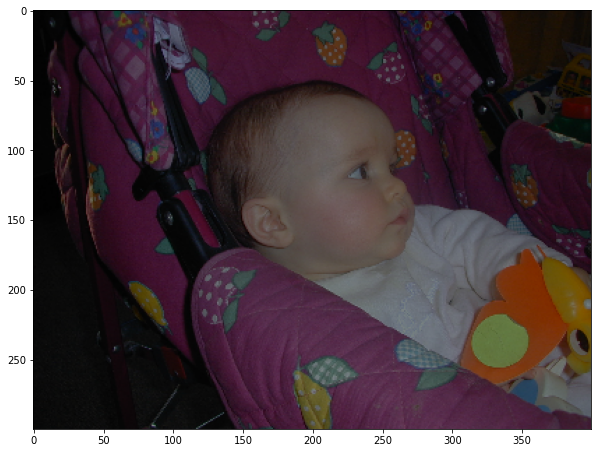

In [ ]:
I = cv2.imread('bebe.png')
plt.figure(figsize=(10,12))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.show()

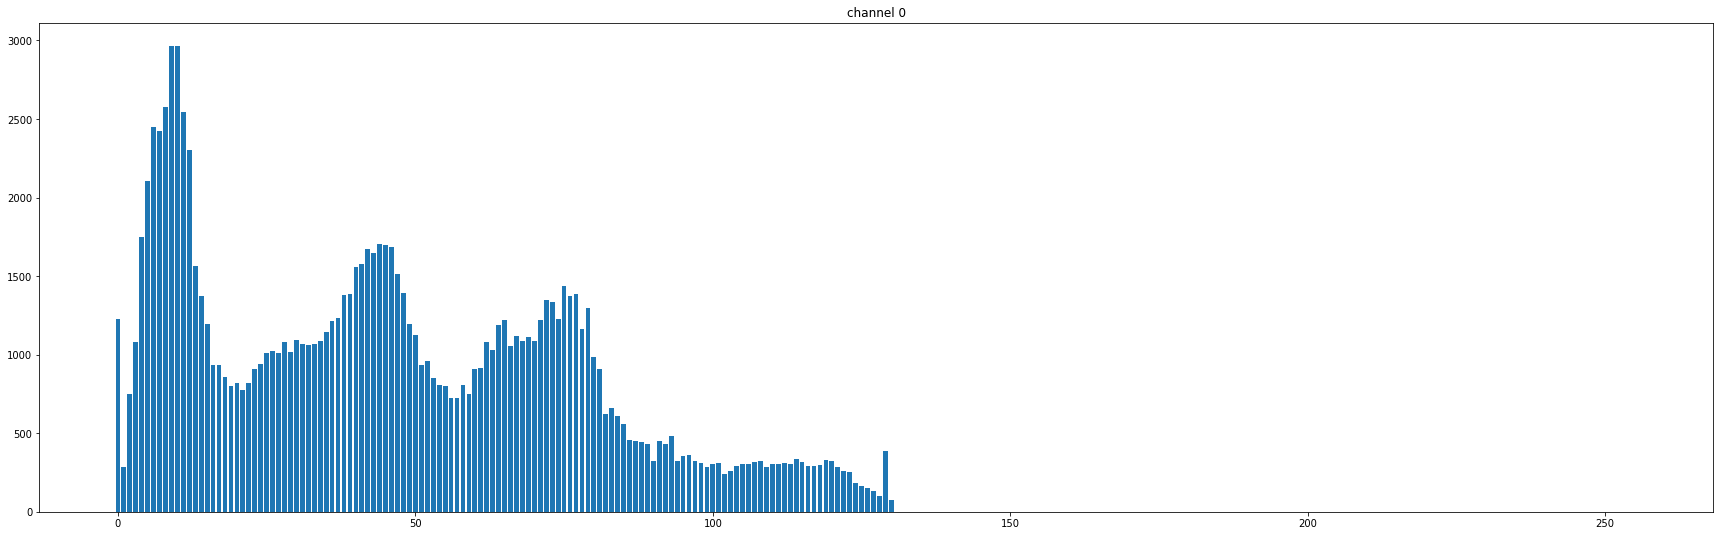

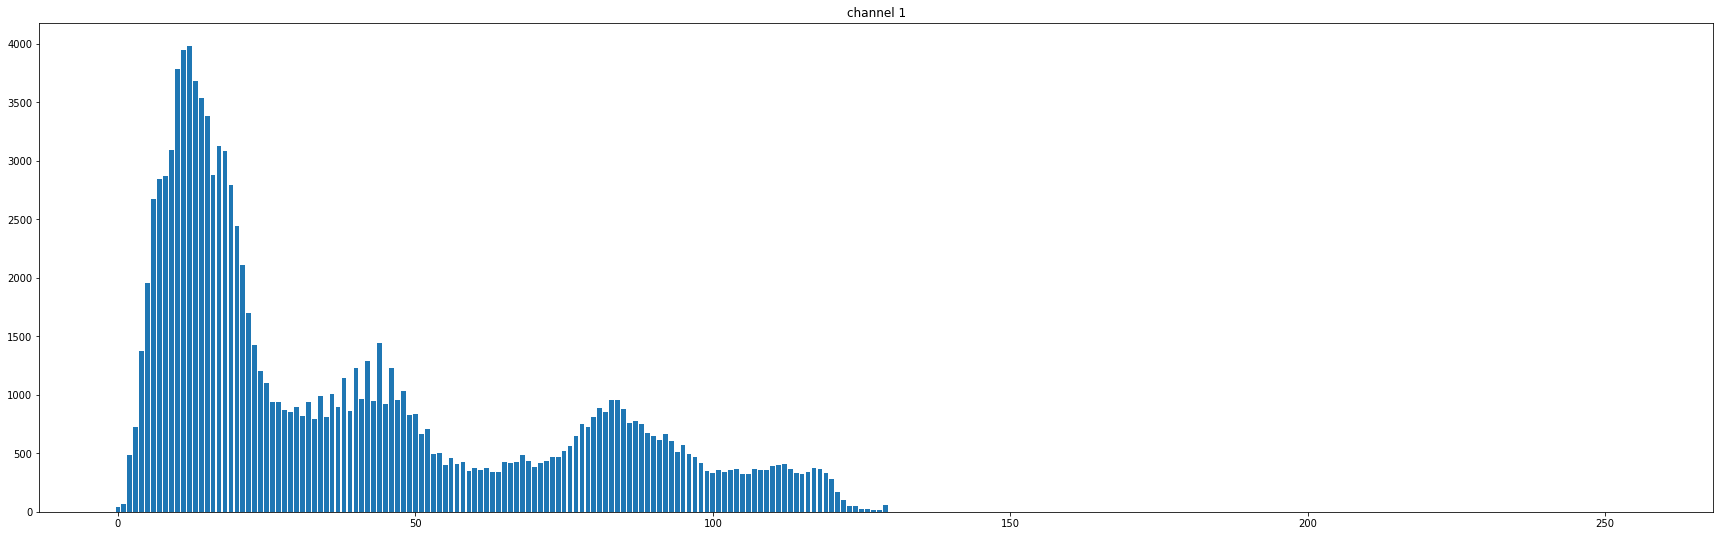

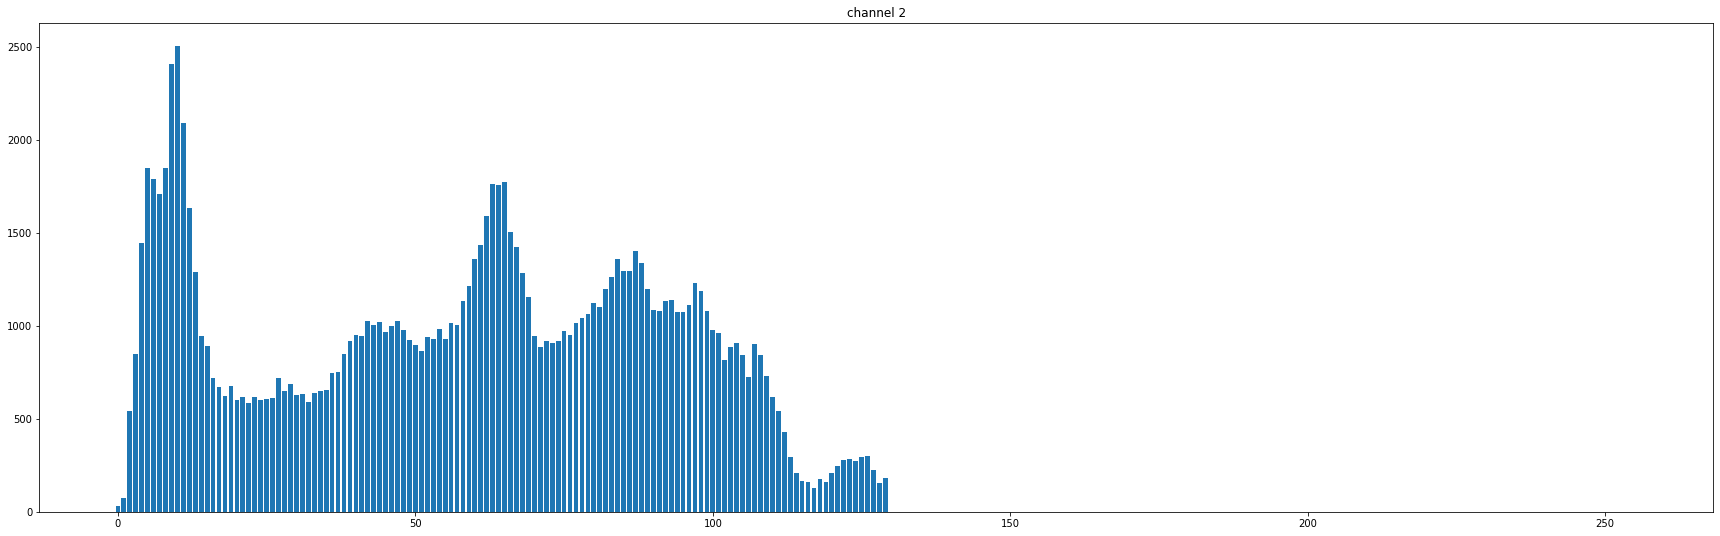

In [ ]:
imhist3(I)

# <font color='darkred'>Lo que no hay que hacer: ecualizar RGB

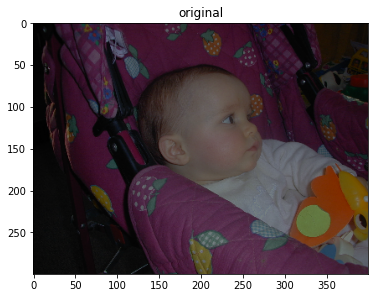

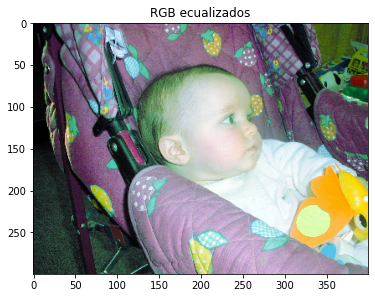

In [ ]:
J = I.copy()
J[:,:,0] = cv2.equalizeHist(I[:,:,0])
J[:,:,1] = cv2.equalizeHist(I[:,:,1])
J[:,:,2] = cv2.equalizeHist(I[:,:,2])

plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(J, cv2.COLOR_BGR2RGB))
plt.title('RGB ecualizados')
plt.show()

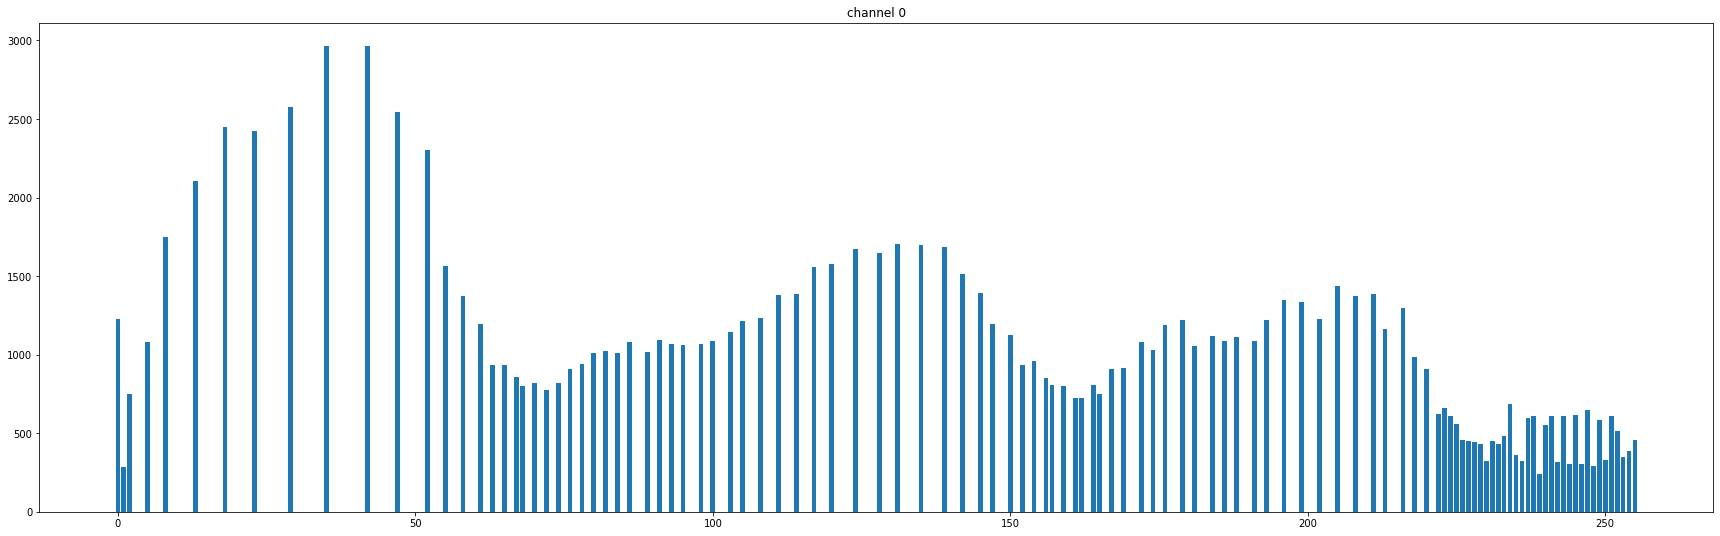

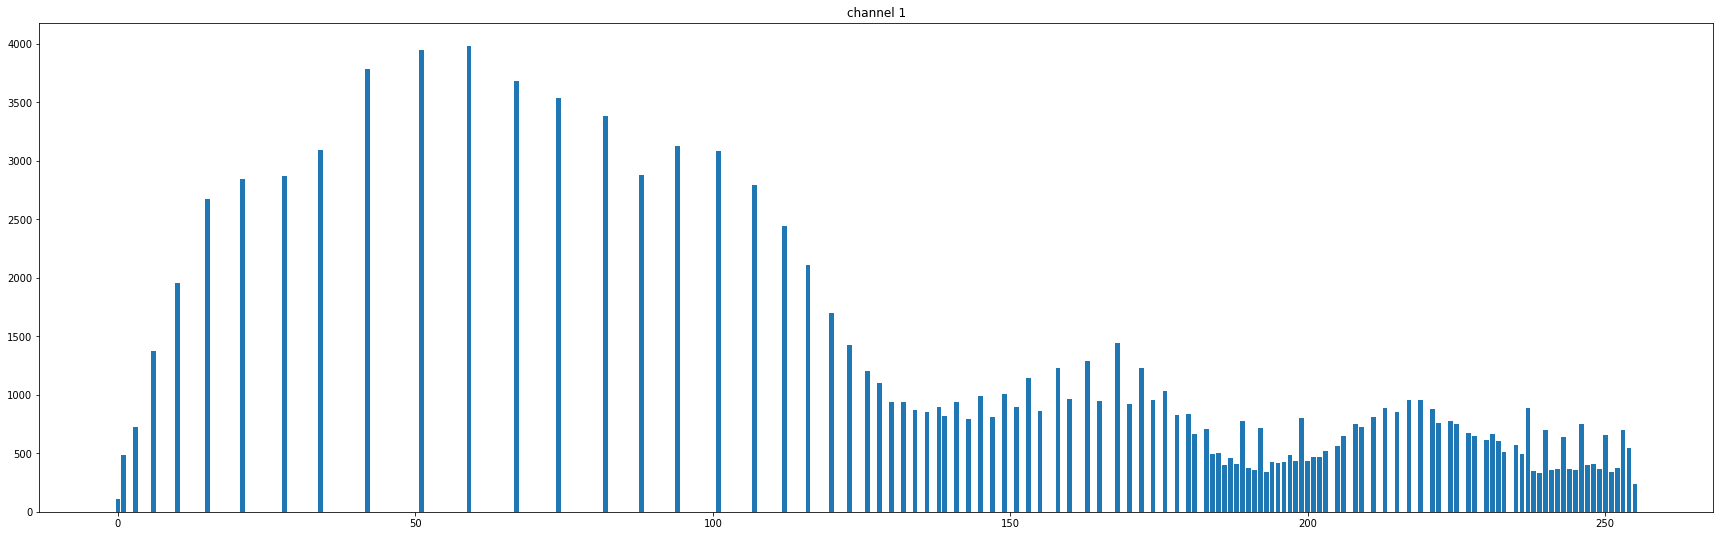

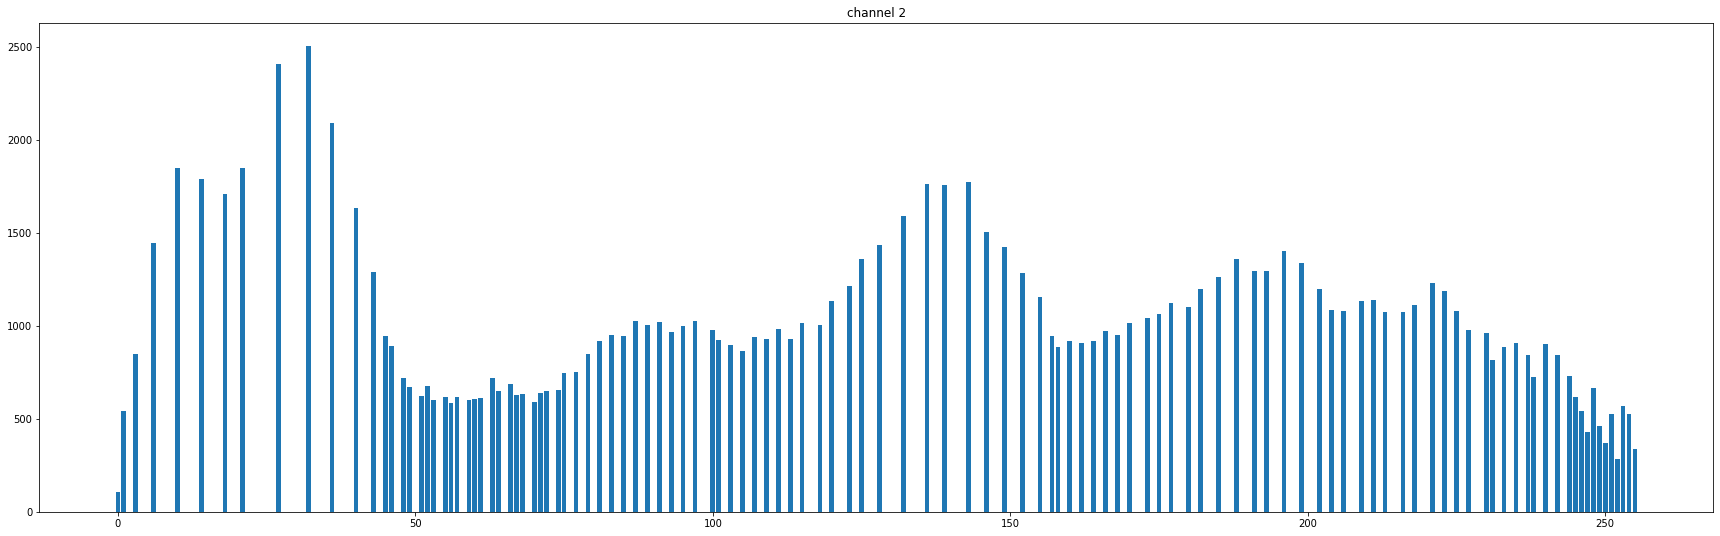

In [ ]:
imhist3(J)

#<font color='darkred'> Lo que sí hay que hacer: ecualizar canal V de HSV

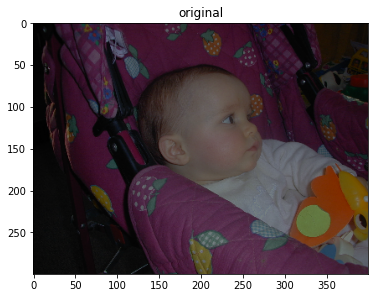

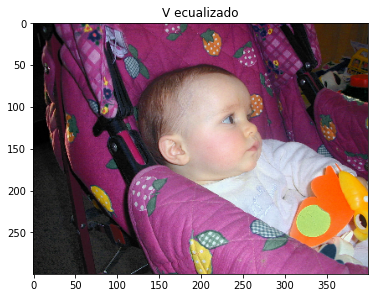

In [ ]:
K = I.copy()

Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)
Khsv[:,:,2] = cv2.equalizeHist(K[:,:,2])
Knew = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))
plt.title('V ecualizado')
plt.show()

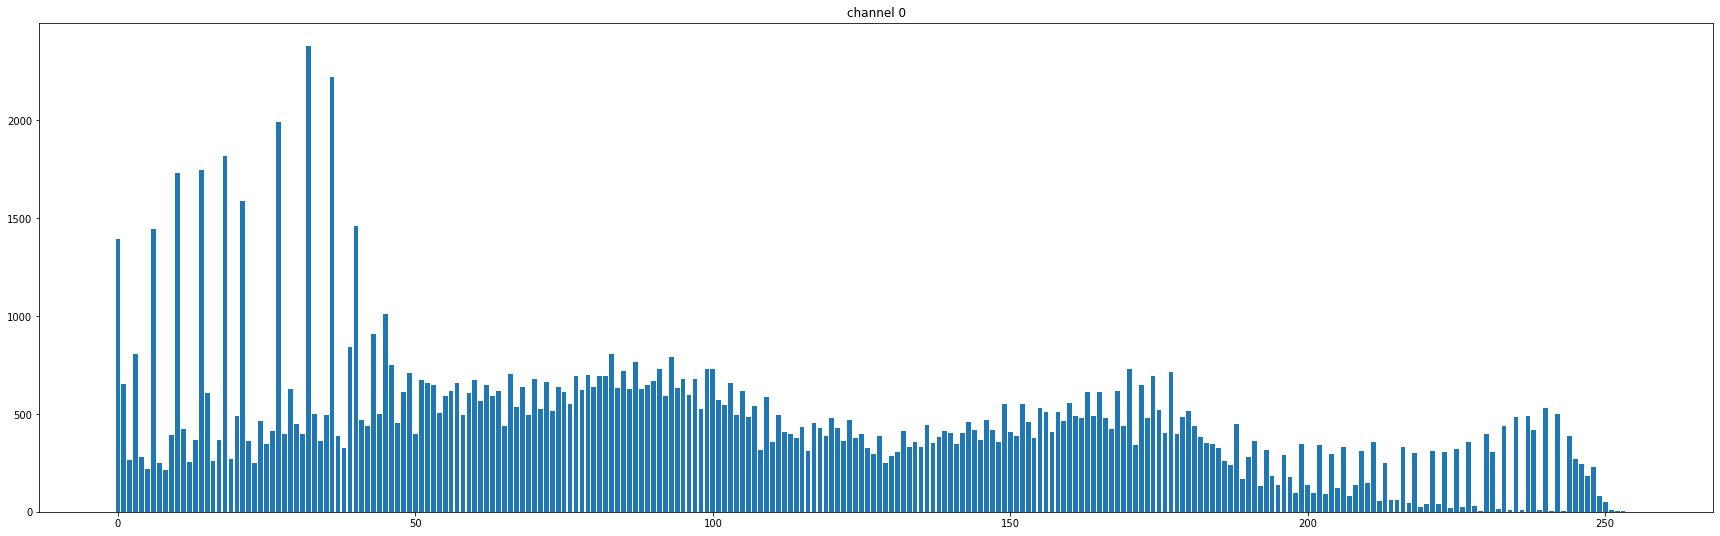

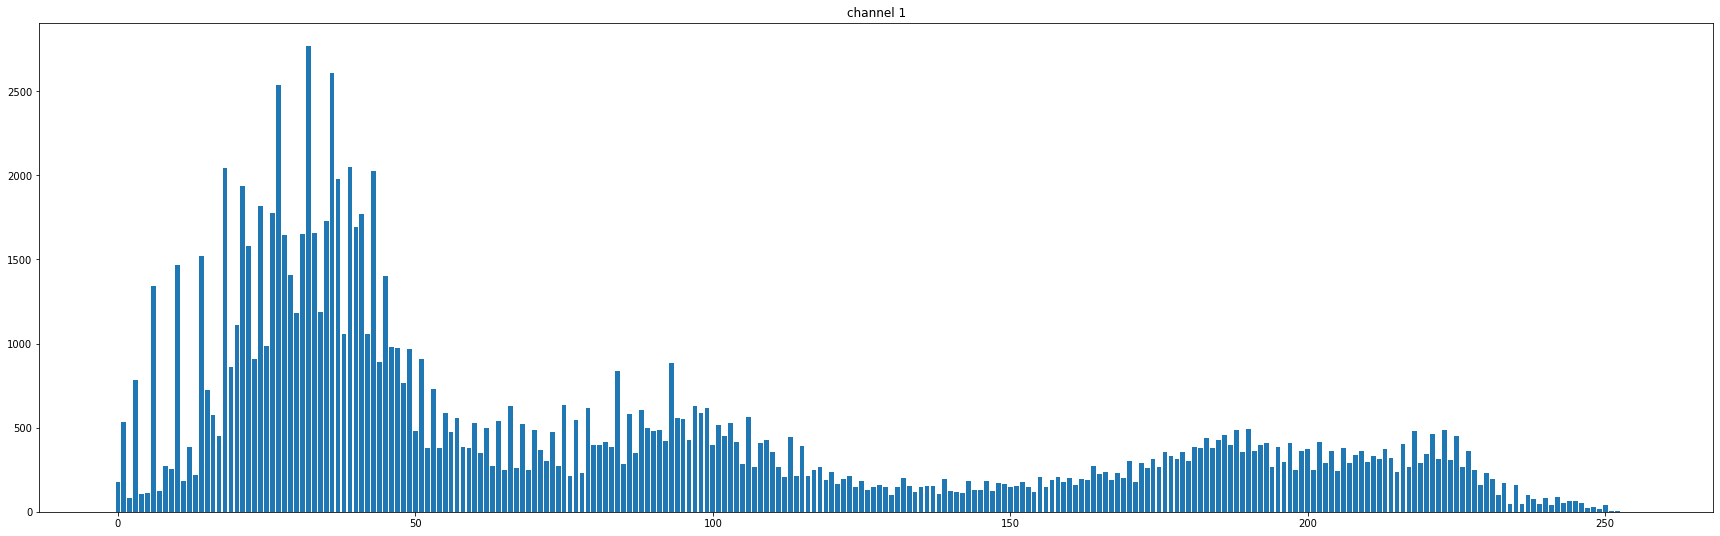

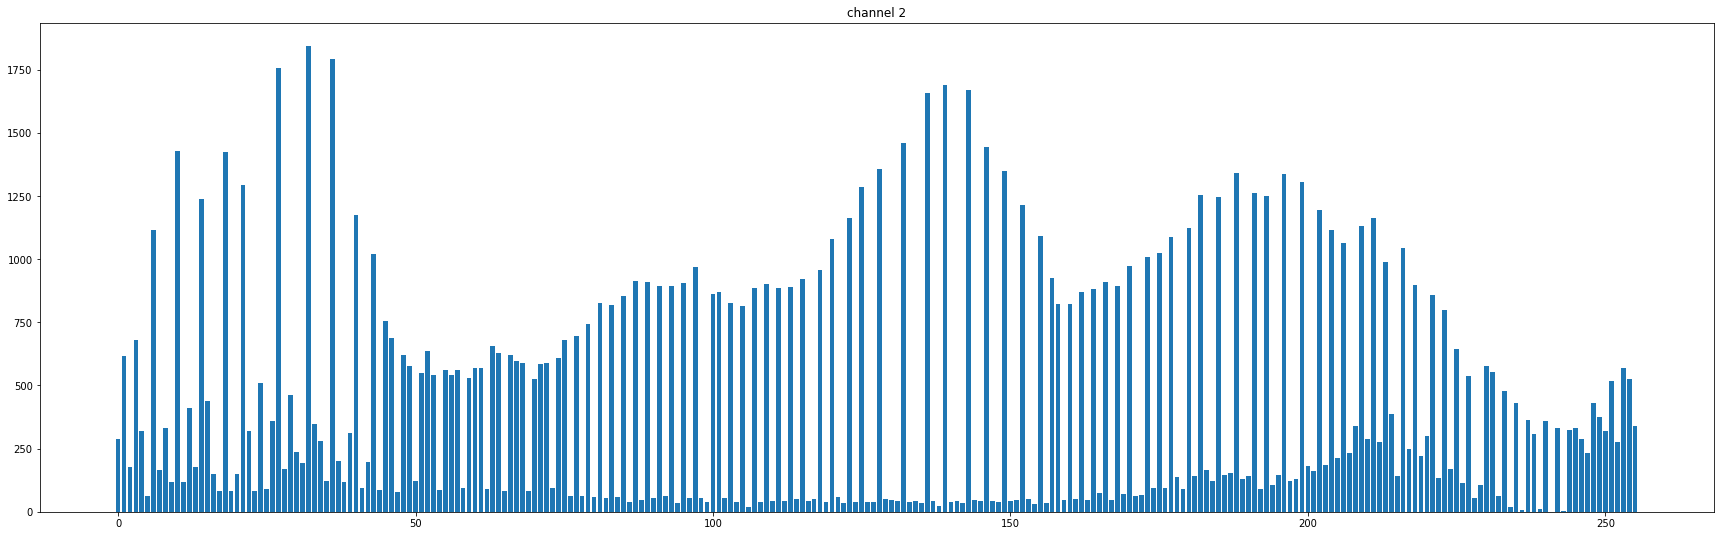

In [ ]:
imhist3(Knew)